In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('lab03.ok')

Assignment: lab03
OK, version v1.13.11



# Lab 3: Regular Expressions / Visualization

In this lab, there are two main sections: The first section is on regular expressions. In the second section, you
will be working on visualizing a dataset from the City of Berkeley containing data on calls to the Berkeley Police Department. Information about the dataset can be found [at this link](https://data.cityofberkeley.info/Public-Safety/Berkeley-PD-Calls-for-Service/k2nh-s5h5).

Note: This lab will not work on older versions of Python; make sure to work on DataHub or activate your DS100 environment if working locally.

**This assignment should be completed and submitted by 11:59 PM on Monday Feb 24, 2020.**

**Warning: This lab includes an analysis of crime in Berkeley. If you feel uncomfortable about the topic, please feel free to contact your GSI or the instructors.**

In [2]:
import pandas as pd
import numpy as np
import re

---
# Section 1: Regular Expressions


You will practice the basic usage of regular expressions and also learn to use `re` module in Python.  Some of the materials are based on the tutorial at http://opim.wharton.upenn.edu/~sok/idtresources/python/regex.pdf. As you work through the first part of the lab, we suggest you to use the website http://regex101.com, especially when you have difficulties matching your answer with the asked part of string. 



We'll start by learning about the simplest possible regular expressions. Since regular expressions are used
to operate on strings, we'll start with the most common task: matching characters.

Most letters and characters will simply match themselves. For example, the regular expression `r'test'` will match the string `test` exactly. There are exceptions to this rule; some characters are special, and don't match themselves.

Here is a list of metacharacters that are widely used in regular experssion. 

<table border="1" class="dataframe" >
<thead>
  <tr style="text-align: right;">
    <th>Pattern </th>
    <th>Description</th> 
  </tr>
 </thead>
 <tbody>
  <tr>
    <td>^</td>
    <td>Matches beginning of line.</td> 
  </tr>
  <tr>
    <td>$</td>
    <td>Matches end of line.</td> 
  </tr>
  <tr>
    <td>.</td>
    <td>Matches any single character except newline. </td> 
  </tr>
  <tr>
    <td>*</td>
    <td>Matches 0 or more occurrences of preceding expression.</td>
  </tr>
  <tr>
    <td>+</td>
    <td>Matches 1 or more occurrence of preceding expression.</td>
  </tr>
  <tr>
    <td>?</td>
    <td>Matches 0 or 1 occurrence of preceding expression.</td>
  </tr>
  <tr>
    <td>[...]</td>
    <td>Matches any single character in brackets.</td>
  </tr>
  <tr>
    <td>[^...]</td>
    <td>Matches any single character <b>not</b> in brackets.</td>
  </tr>
  <tr>
    <td>{n}</td>
    <td>Matches exactly n number of occurrences of preceding expression.</td>
  </tr>
  <tr>
    <td>{n,}</td>
    <td>Matches n or more occurrences of preceding expression.</td>
  </tr>
  <tr>
    <td>{n,m}</td>
    <td>Matches at least n and at most m occurrences of preceding expression.</td>
  </tr>
  <tr>
    <td>a|b</td>
    <td>Matches either a or b.</td>
  </tr>
  <tr>
    <td>\1...\9</td>
    <td>Matches n-th grouped subexpression.</td>
  </tr>
  </tbody>
</table>


Perhaps the most important metacharacter is the backslash, ‘\’. As in Python string literals, the backslash
can be followed by various characters to signal various special sequences. It’s also used to escape all the
metacharacters so you can still match them in patterns; for example, if you need to match a `[` or `\`, you
can precede them with a backslash to remove their special meaning:  `\[` or `\\`. 

The following predefined special sequences are available:

<table border="1" class="dataframe" >
<thead>
  <tr style="text-align: right;">
    <th>Pattern </th>
    <th>Description</th> 
  </tr>
 </thead>
 <tbody>
  <tr>
    <td>\d</td>
    <td>Matches any decimal digit; this is equivalent to the class `[0-9]`</td> 
  </tr>
  <tr>
    <td>\D</td>
    <td>Matches any non-digit character; this is equivalent to the class `[^0-9]`.</td> 
  </tr>
  <tr>
    <td>\s</td>
    <td>Matches any whitespace character; this is equivalent to the class `[ \t\n\r\f\v]` </td> 
  </tr>
  <tr>
    <td>\S</td>
    <td>Matches any non-whitespace character; this is equivalent to the class `[^ \t\n\r\f\v]`.</td>
  </tr>
  <tr>
    <td>\w</td>
    <td>Matches any alphanumeric character; this is equivalent to the class `[a-zA-Z0-9_]`</td>
  </tr>
  <tr>
    <td>\W</td>
    <td>Matches any non-alphanumeric character; this is equivalent to the class `[^a-zA-Z0-9_]`.</td>
  </tr>
  </tbody>
</table>

# Question 1
In this question, write patterns that match the given sequences. It may be as simple as the common letters on each line.

---
## Question 1a

Write a single regular expression to match the following strings without using the `|` operator.

1. **Match:** `abcdefg`
1. **Match:** `abcde`
1. **Match:** `abc`
1. **Skip:** `c abc`

<!--
BEGIN QUESTION
name: q1a
-->

In [3]:
regx1 = r"^[a-z]*$" # fill in your pattern
...

In [4]:
ok.grade("q1a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 5
    Failed: 0
[ooooooooook] 100.0% passed



---
## Question 1b

Write a single regular expression to match the following strings without using the `|` operator.

1. **Match:** `can`
1. **Match:** `man`
1. **Match:** `fan`
1. **Skip:** `dan`
1. **Skip:** `ran`
1. **Skip:** `pan`

<!--
BEGIN QUESTION
name: q1b
-->

In [5]:
regx2 = r"[^drp]+an" # fill in your pattern
...

In [6]:
ok.grade("q1b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 7
    Failed: 0
[ooooooooook] 100.0% passed



# Question 2

Now that we have written a few regular expressions, we are now ready to move beyond matching. In this question, we'll take a look at some methods from the `re` package.

---
## Question 2a:

Write a Python program to extract and print the numbers of a given string. 

1. **Hint:** use `re.findall`
2. **Hint:** use `\d` for digits and one of either `*` or `+`.

<!--
BEGIN QUESTION
name: q2a
-->

In [7]:
text_q2a = "Ten 10, Twenty 20, Thirty 30"

res_q2a = re.findall(r"[0-9]+",text_q2a)
def print_some_nums(l):
    for i in np.arange(len(l)):
        print(l[i])
res_q2a
print_some_nums(res_q2a)
#res_q2a = print_some_nums(res_q2a)

10
20
30


In [8]:
ok.grade("q2a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



---
## Question 2b:

Write a Python program to replace at most 2 occurrences of space, comma, or dot with a colon.

**Hint:** use `re.sub(regex, "newtext", string, number_of_occurences)`

<!--
BEGIN QUESTION
name: q2b
-->

In [9]:
text_q2b = 'Python Exercises, PHP exercises.'


res_q2b = re.sub(r"[\s\.\,]",":",text_q2b,2) # Hint: use re.sub()
...

res_q2b

'Python:Exercises: PHP exercises.'

In [10]:
ok.grade("q2b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



---
## Question 2c: 

Write a Python program to extract values between quotation marks of a string.

**Hint:** use `re.findall`


<!--
BEGIN QUESTION
name: q2c
-->

In [11]:
text_q2c = '"Python", "PHP", "Java"'
res_q2c = re.findall(r"[a-zA-Z]*",text_q2c)
def no_quotes_pls(lsit):
    a_list = []
    for i in np.arange(len(lsit)):
        if len(lsit[i])>2:
            a_list.append(lsit[i])
    return a_list
res_q2c = no_quotes_pls(res_q2c)
res_q2c

['Python', 'PHP', 'Java']

In [12]:
ok.grade("q2c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Question 2d:

Write a regular expression to extract and print the quantity and type of objects in a string. You may assume that a space separates quantity and type, ie. `"{quantity} {type}"`. See the example string below for more detail.

1. **Hint:** use `re.findall`
2. **Hint:** use `\d` for digits and one of either `*` or `+`.

<!--
BEGIN QUESTION
name: q2d
-->

In [13]:
text_q2d = "I've got 10 eggs that I stole from 20 gooses belonging to 30 giants."
pattern = r"[0-9]+[\s][a-z]+"
res_q2d = re.findall(pattern,text_q2d)
...

res_q2d

['10 eggs', '20 gooses', '30 giants']

In [14]:
ok.grade("q2d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Question 2e:

Write a regular expression to replace all vowels with a lowercase letter “o”. Given that address is a string, use re.sub to change "123 Orange Street" into "123 orongo Stroot". This question is from Disc05, Question #7.

**Hint:** use `re.sub(regex, "newtext", string, number_of_occurences)`


<!--
BEGIN QUESTION
name: q2e
-->

In [15]:
text_q2e = "123 Orange Street"

res_q2e = re.sub(r"[aeiouO]","o",text_q2e)


res_q2e

'123 orongo Stroot'

In [16]:
ok.grade("q2e");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Question 2f:

Fill in the regular expression in the variable pattern below so that after it executes, day is 26, month is Jan, and year is 2014.

1. **Hint:** use `re.findall`
2. **Hint:** pay attention to the data type after using `re.findall`
3. **Hint:** use `\[` and `\/` to match the character '[' and '/'.


<!--
BEGIN QUESTION
name: q2f
-->

In [17]:
text_q2f = '169.237.46.168 - - [26/Jan/2014:10:47:58 -0800] \
"GET /stat141/Winter04/ HTTP/1.1" 200 2585 \
"http://anson.ucdavis.edu/courses/"'
pattern = re.findall(r"\[(\d+)\/(\w+)\/(\d+)", text_q2f)[0] # Hint: only pattern has to be regular expression
day = pattern[0] # day, month, year all depend on pattern
month = pattern[1]
year = pattern[2]
pattern

('26', 'Jan', '2014')

In [18]:
ok.grade("q2f");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



--- 

# Section 2: Visualization


In [19]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib
import matplotlib.pyplot as plt

# optional seaborn styling
plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (12, 9)

For this part of the assignment we will use the Berkeley Police Department Call Logs.

In [20]:
import ds100_utils

data_dir = 'data'
data_url = 'http://www.ds100.org/sp20/assets/datasets/lab03_data_sp20.zip'
file_name = 'lab03_data_sp20.zip'

dest_path = ds100_utils.fetch_and_cache(data_url=data_url, file=file_name, data_dir=data_dir)
print(f'Located at {dest_path}')

Using cached version that was downloaded (UTC): Wed Feb 19 22:20:54 2020
Located at data/lab03_data_sp20.zip


We will open the zip file contents without decompressing it.  Run the cell below to open the calls data.

In [21]:
my_zip = zipfile.ZipFile(dest_path, 'r')
calls = pd.read_csv(my_zip.open('Berkeley_PD_-_Calls_for_Service.csv'))
calls.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
0,18022300,DISTURBANCE,04/18/2018 12:00:00 AM,22:17,DISORDERLY CONDUCT,3,09/06/2018 03:30:12 AM,"OREGON STREET &amp; MCGEE AVE\nBerkeley, CA\n(...",OREGON STREET & MCGEE AVE,Berkeley,CA
1,18026683,THEFT MISD. (UNDER $950),05/09/2018 12:00:00 AM,21:25,LARCENY,3,09/06/2018 03:30:13 AM,"200 UNIVERSITY AVE\nBerkeley, CA\n(37.865511, ...",200 UNIVERSITY AVE,Berkeley,CA
2,18038550,THEFT MISD. (UNDER $950),05/18/2018 12:00:00 AM,20:00,LARCENY,5,09/06/2018 03:30:09 AM,"2200 MILVIA ST\nBerkeley, CA\n(37.868574, -122...",2200 MILVIA ST,Berkeley,CA
3,18014810,BURGLARY AUTO,03/13/2018 12:00:00 AM,08:50,BURGLARY - VEHICLE,2,09/06/2018 03:30:08 AM,"1200 SIXTH ST\nBerkeley, CA\n(37.881142, -122....",1200 SIXTH ST,Berkeley,CA
4,18018643,ALCOHOL OFFENSE,03/31/2018 12:00:00 AM,13:29,LIQUOR LAW VIOLATION,6,09/06/2018 03:30:11 AM,"CENTER STREET &amp; SHATTUCK AVE\nBerkeley, CA...",CENTER STREET & SHATTUCK AVE,Berkeley,CA


## Pandas Examples

Pandas offers basic functionality for plotting. For example, the `DataFrame` and `Series` classes both have a `plot` method. 

As you learn to do data visualization, you may find the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)  helpful!

As an example of the built-in plotting functionality of pandas, the following example uses `plot` method of the `Series` class to generate a `barh` plot type to visually display the value counts for `CVLEGEND`.

There are also many other plots that we will explore throughout the lab.

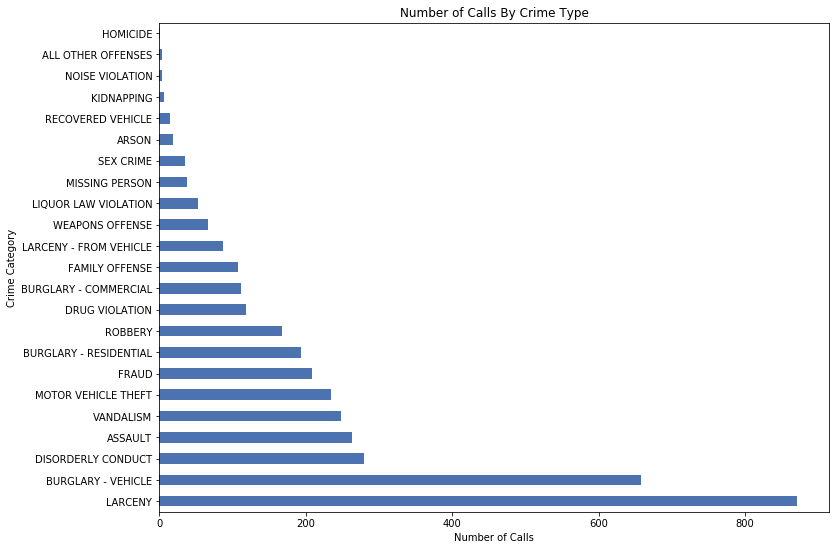

In [22]:
ax = calls['CVLEGEND'].value_counts().plot(kind='barh')
ax.set_ylabel("Crime Category")
ax.set_xlabel("Number of Calls")
ax.set_title("Number of Calls By Crime Type");



## An Additional Note on Plotting in Jupyter Notebooks

You may have noticed that many of our code cells involving plotting end with a semicolon (;). This prevents any extra output from the last line of the cell that we may not want to see. Try adding this to your own code in the following questions!

## Question 3

Now it is your turn to make some plots using `pandas`  Let's start by transforming the data so that it is easier to work with We then will look at some distributions of the data. 

The CVDOW field isn't named helpfully and it is hard to see the meaning from the data alone. According to the website linked at the top of this notebook, CVDOW is actually indicating the day that events happened. 0->Sunday, 1->Monday ... 6->Saturday. 

### Question 3a

Add a new column `Day` into the `calls` dataframe that has the string weekday (eg. 'Sunday') for the corresponding value in CVDOW. For example, if the first 3 values of `CVDOW` are `[3, 6, 0]`, then the first 3 values of the `Day` column should be `["Wednesday", "Saturday", "Sunday"]`.

**Hint:** *Try using the [Series.map](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) function on `calls["CVDOW"]`.  Can you assign this to the new column `calls["Day"]`?*

<!--
BEGIN QUESTION
name: q3a
-->

In [23]:
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
day_indices = range(7)
indices_to_days_dict = dict(zip(day_indices, days)) # Should look like {0:"Sunday", 1:"Monday", ..., 6:"Saturday"}
calls["Day"] = calls["CVDOW"].map(lambda x: indices_to_days_dict[x])
calls

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State,Day
0,18022300,DISTURBANCE,04/18/2018 12:00:00 AM,22:17,DISORDERLY CONDUCT,3,09/06/2018 03:30:12 AM,"OREGON STREET &amp; MCGEE AVE\nBerkeley, CA\n(...",OREGON STREET & MCGEE AVE,Berkeley,CA,Wednesday
1,18026683,THEFT MISD. (UNDER $950),05/09/2018 12:00:00 AM,21:25,LARCENY,3,09/06/2018 03:30:13 AM,"200 UNIVERSITY AVE\nBerkeley, CA\n(37.865511, ...",200 UNIVERSITY AVE,Berkeley,CA,Wednesday
2,18038550,THEFT MISD. (UNDER $950),05/18/2018 12:00:00 AM,20:00,LARCENY,5,09/06/2018 03:30:09 AM,"2200 MILVIA ST\nBerkeley, CA\n(37.868574, -122...",2200 MILVIA ST,Berkeley,CA,Friday
3,18014810,BURGLARY AUTO,03/13/2018 12:00:00 AM,08:50,BURGLARY - VEHICLE,2,09/06/2018 03:30:08 AM,"1200 SIXTH ST\nBerkeley, CA\n(37.881142, -122....",1200 SIXTH ST,Berkeley,CA,Tuesday
4,18018643,ALCOHOL OFFENSE,03/31/2018 12:00:00 AM,13:29,LIQUOR LAW VIOLATION,6,09/06/2018 03:30:11 AM,"CENTER STREET &amp; SHATTUCK AVE\nBerkeley, CA...",CENTER STREET & SHATTUCK AVE,Berkeley,CA,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
3783,18045829,THEFT MISD. (UNDER $950),08/15/2018 12:00:00 AM,08:42,LARCENY,3,09/06/2018 03:30:10 AM,"2300 TELEGRAPH AVE\nBerkeley, CA\n(37.868714, ...",2300 TELEGRAPH AVE,Berkeley,CA,Wednesday
3784,18040137,DISTURBANCE,07/17/2018 12:00:00 AM,10:34,DISORDERLY CONDUCT,2,09/06/2018 03:30:13 AM,"1100 UNIVERSITY AVE\nBerkeley, CA\n(37.869067,...",1100 UNIVERSITY AVE,Berkeley,CA,Tuesday
3785,18090816,VANDALISM,05/16/2018 12:00:00 AM,20:00,VANDALISM,3,09/06/2018 03:30:13 AM,"800 VICENTE RD\nBerkeley, CA\n",800 VICENTE RD,Berkeley,CA,Wednesday
3786,18024397,SEXUAL ASSAULT FEL.,04/28/2018 12:00:00 AM,17:00,SEX CRIME,6,09/06/2018 03:30:12 AM,"2700 BANCROFT WAY\nBerkeley, CA\n(37.869312, -...",2700 BANCROFT WAY,Berkeley,CA,Saturday


In [24]:
ok.grade("q3a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 3b

Now let's look at the EVENTTM column which indicates the time for events. Since it contains hour and minute information, let's extract the hour info and create a new column named `Hour` in the `calls` dataframe. You should save the hour as an `int`.


**Hint:** * Your code should only require one line

<!--
BEGIN QUESTION
name: q3b
-->

In [25]:
calls['Hour'] = calls['EVENTTM'].map(lambda x : int(x.split(':')[0]))
calls

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State,Day,Hour
0,18022300,DISTURBANCE,04/18/2018 12:00:00 AM,22:17,DISORDERLY CONDUCT,3,09/06/2018 03:30:12 AM,"OREGON STREET &amp; MCGEE AVE\nBerkeley, CA\n(...",OREGON STREET & MCGEE AVE,Berkeley,CA,Wednesday,22
1,18026683,THEFT MISD. (UNDER $950),05/09/2018 12:00:00 AM,21:25,LARCENY,3,09/06/2018 03:30:13 AM,"200 UNIVERSITY AVE\nBerkeley, CA\n(37.865511, ...",200 UNIVERSITY AVE,Berkeley,CA,Wednesday,21
2,18038550,THEFT MISD. (UNDER $950),05/18/2018 12:00:00 AM,20:00,LARCENY,5,09/06/2018 03:30:09 AM,"2200 MILVIA ST\nBerkeley, CA\n(37.868574, -122...",2200 MILVIA ST,Berkeley,CA,Friday,20
3,18014810,BURGLARY AUTO,03/13/2018 12:00:00 AM,08:50,BURGLARY - VEHICLE,2,09/06/2018 03:30:08 AM,"1200 SIXTH ST\nBerkeley, CA\n(37.881142, -122....",1200 SIXTH ST,Berkeley,CA,Tuesday,8
4,18018643,ALCOHOL OFFENSE,03/31/2018 12:00:00 AM,13:29,LIQUOR LAW VIOLATION,6,09/06/2018 03:30:11 AM,"CENTER STREET &amp; SHATTUCK AVE\nBerkeley, CA...",CENTER STREET & SHATTUCK AVE,Berkeley,CA,Saturday,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3783,18045829,THEFT MISD. (UNDER $950),08/15/2018 12:00:00 AM,08:42,LARCENY,3,09/06/2018 03:30:10 AM,"2300 TELEGRAPH AVE\nBerkeley, CA\n(37.868714, ...",2300 TELEGRAPH AVE,Berkeley,CA,Wednesday,8
3784,18040137,DISTURBANCE,07/17/2018 12:00:00 AM,10:34,DISORDERLY CONDUCT,2,09/06/2018 03:30:13 AM,"1100 UNIVERSITY AVE\nBerkeley, CA\n(37.869067,...",1100 UNIVERSITY AVE,Berkeley,CA,Tuesday,10
3785,18090816,VANDALISM,05/16/2018 12:00:00 AM,20:00,VANDALISM,3,09/06/2018 03:30:13 AM,"800 VICENTE RD\nBerkeley, CA\n",800 VICENTE RD,Berkeley,CA,Wednesday,20
3786,18024397,SEXUAL ASSAULT FEL.,04/28/2018 12:00:00 AM,17:00,SEX CRIME,6,09/06/2018 03:30:12 AM,"2700 BANCROFT WAY\nBerkeley, CA\n(37.869312, -...",2700 BANCROFT WAY,Berkeley,CA,Saturday,17


In [26]:
ok.grade("q3b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 3c

Using `pandas`, Construct a vertical bar plot with the count of the number of calls (entries in the table) for each day of the week **ordered by the day of the week** (eg. `Sunday`, `Monday`, ...). Be sure that your axes are labeled and that your plot is titled.  There should be approximately 500 calls per day.

**Hint:** *Given a series `s`, and an array `coolIndex` that has the same entries as in `s.index`, `s[coolIndex]` will return a copy of the series in the same order as `coolIndex`.*

<!--
BEGIN QUESTION
name: q3c
-->

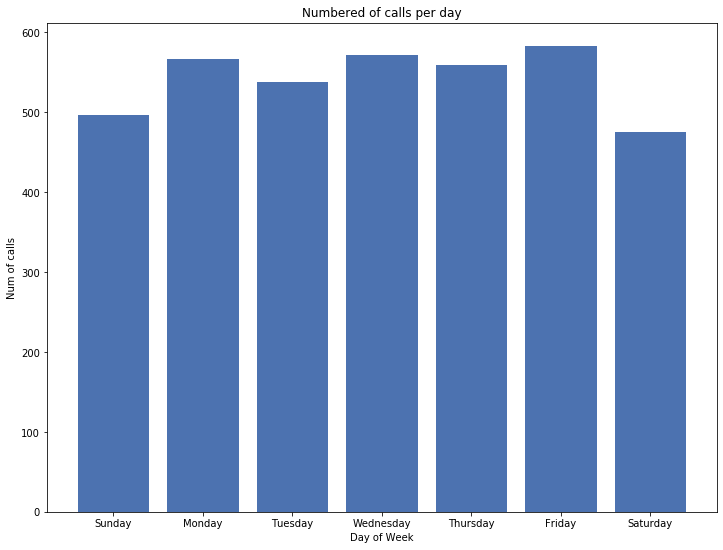

In [27]:
#order = ['Sun','Mon', 'Tues', 'Weds','Thurs','Fri','Sat']
#calls.set_index('Day').loc[order].groupby('Day').plot(kind='bar')
table_a = calls.groupby(calls['CVDOW']).agg({'Day':'first','CASENO':'count'})
table_a = table_a.reset_index()

plt.bar(table_a['Day'],table_a['CASENO'])
plt.xlabel('Day of Week')
plt.ylabel('Num of calls')
plt.title('Numbered of calls per day')
# Leave this for grading purposes
ax_3c = plt.gca()

In [28]:
ok.grade("q3c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 3d


Using `pandas`, construct a line plot with the count of the number of calls (entries in the table) for each hour of the day  **ordered by the time** (eg. `12:00 AM`, `1:00 AM`, ...). Be sure that your axes are labeled and that your plot is titled. 

<!--
BEGIN QUESTION
name: q3d

-->

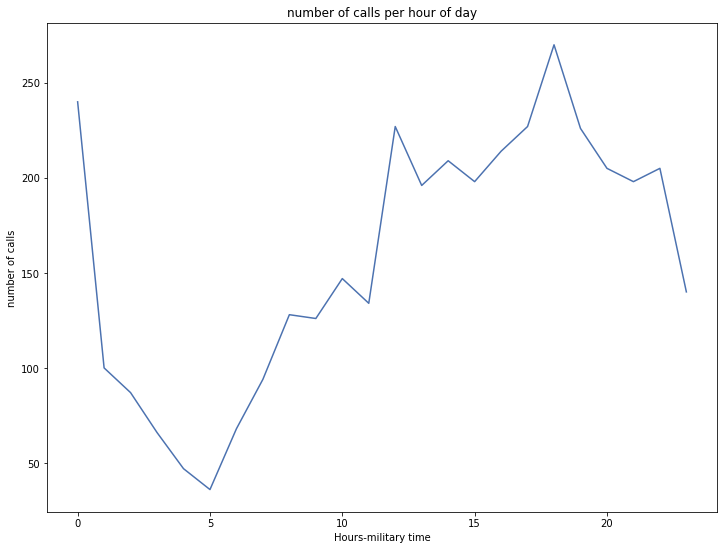

In [29]:
#diction = {0:'12:00 AM',1:'1:00 AM',2:'2:00 AM',3:'3:00 AM',4:'4:00 AM',}
hours = [x for x in range(24)]
table_b = calls.groupby(calls['Hour']).agg({'Day':'first','CASENO':'count'})
table_b = table_b.reset_index()

table_b
plt.plot(table_b['Hour'],table_b['CASENO'])
plt.xlabel('Hours-military time')
plt.ylabel('number of calls')
plt.title("number of calls per hour of day")

# Leave this for grading purposes
ax_3d = plt.gca()

In [30]:
ok.grade("q3d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



##### Why do you think this happens? Are there more calls in the day or night? What is the least popular time? Most? (Answer Below)

The calls are at a high at eight pm, then dips to a low around 5 am, and continues to rise until around dinner time. There are definitely more calls at night. Crimes tend to happen after dark, I suppose. 

## Question 4

It seems weekdays generally have slightly more calls than Saturday or Sunday, but the difference does not look significant.  

We can break down into some particular types of events to see their distribution. For example, let's make a bar plot for the CVLEGEND "ROBBERY". Which day is the peak for "ROBBERY"?

### Question 4a

Use `pandas` to create a vertical bar plot of the number of total robberies reported on each day of the week, again ordered by the days of the week starting with Sunday.

**Hint:** *This should be very similar to Question 3b*

<!--
BEGIN QUESTION
name: q4a
-->

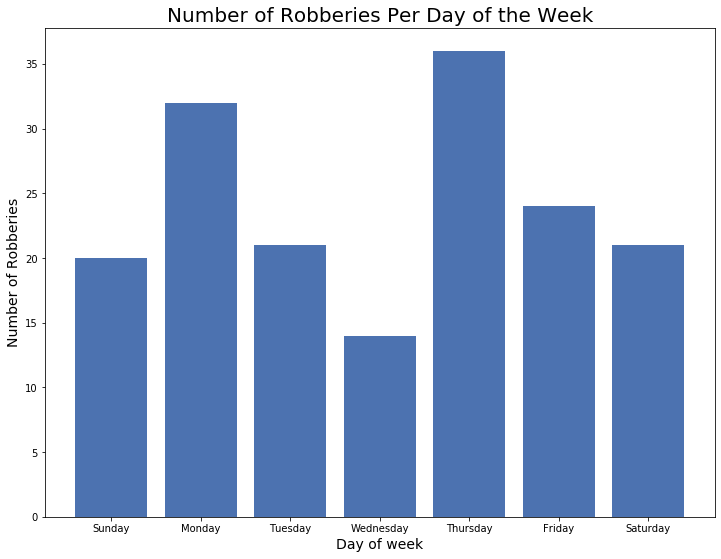

In [31]:
filtered = calls[calls["CVLEGEND"] == "ROBBERY"]
table_c = calls[calls['CVLEGEND']=='ROBBERY']
table_c = table_c.groupby(calls['CVDOW']).agg({'Day':'first','CASENO':'count'})
plt.bar(table_c['Day'],table_c['CASENO'])
plt.xlabel('Day of week', fontsize = 14)
plt.ylabel('Number of Robberies',fontsize = 14)
plt.title('Number of Robberies Per Day of the Week', fontsize = 20)


# Leave this for grading purposes
ax_4a = plt.gca()

In [32]:
ok.grade("q4a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 4b

Do you observe anything interesting about the distribution of ROBBERY calls over a week? Type a 1-sentence answer in the cell below.

Wednesdays are chill; no but it seems robberies peak on monsday and tuesday and decline steadily after the peak till the next peak comes. 

## Question 5

In the cell below, generate a boxplot which examines the hour of day of each crime broken down by the `CVLEGEND` value.  To construct this plot use the [DataFrame.boxplot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html) documentation.

##### Looking at your plot, which crime type appears to have the largest interquartile range? Put your results into `answer5` as a string.


<!--
BEGIN QUESTION
name: q5
-->

<Figure size 7200x720 with 0 Axes>

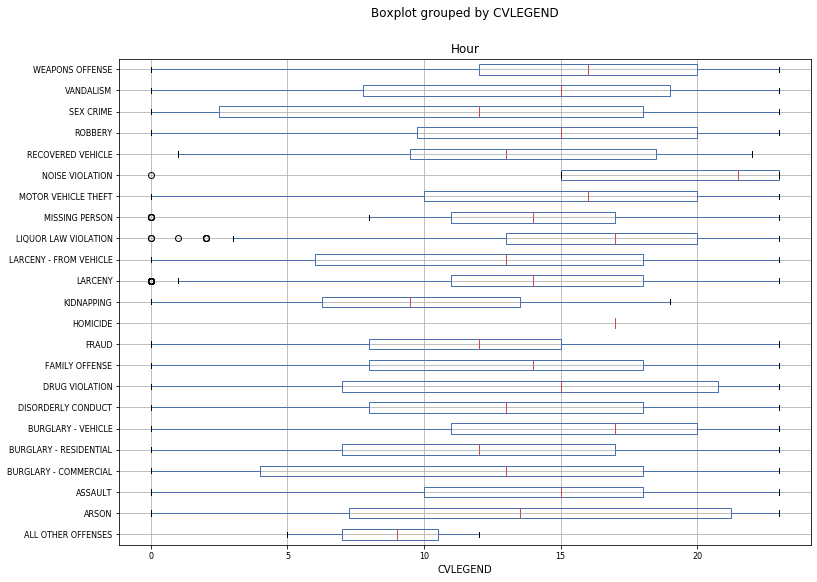

<Figure size 7200x720 with 0 Axes>

In [33]:
answer5 = 'SEX CRIME'
calls.boxplot(column ='Hour',by ='CVLEGEND',fontsize = 8, vert = False)
plt.figure(figsize = [100,10])

In [34]:
ok.grade("q5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Important**: To make sure the test cases run correctly, click `Kernel>Restart & Run All` and make sure all of the test cases are still passing. Doing so will submit your code for you. 

If your test cases are no longer passing after restarting, it's likely because you're missing a variable, or that modifications that you'd previously made to your Data Frame are no longer taking place (perhaps because you deleted a cell). 

You may submit this assignment as many times as you'd like before the deadline.

**You must restart and run all cells before submitting. Otherwise, you may pass test cases locally, but not on our servers. We will not entertain regrade requests of the form, “my code passed all of my local test cases, but failed the autograder”.**

## Congratulations

Congrats! You are finished with this assignment.

# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

In [ ]:
# Save your notebook first, then run this cell to submit.
ok.submit()